# Conectando google collage al drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importando os, numpy, matplatlib y mpl_toolkits que son esenciales para la realización de estes ejercicio

In [2]:
import os
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from sklearn import preprocessing
import csv
%matplotlib inline

# Extrayendo los datos del dataset
de los datos extraidos se eliminan los datos no numericos, y la columna 1 que es de valores nulos y la primera fila 0 encabezado de las columnas

In [3]:
#cargado de datos
df = pd.read_csv("/content/drive/MyDrive/IA/dataset/Diamonds Prices2022.csv", sep=",")
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('x', axis=1)
df = df.drop('y', axis=1)
df = df.drop('z', axis=1)

diccionario = {"Ideal": 0, "Premium": 1, "Good": 2, "Very Good": 3, "Fair": 4}
df["cut"] = df["cut"].replace(diccionario)
diccionario = {"G": 0, "E": 1, "F": 2, "H": 3, "D": 4, "I": 5, "J": 6}
df["color"] = df["color"].replace(diccionario)
diccionario = {"SI1": 0, "VS2": 1, "SI2": 2, "VS1": 3, "VVS2": 4, "VVS1": 5, "IF": 6, "I1": 7}
df["clarity"] = df["clarity"].replace(diccionario)
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,price
0,0.23,0,1,2,61.5,55.0,326
1,0.21,1,1,0,59.8,61.0,326
2,0.23,2,1,3,56.9,65.0,327
3,0.29,1,5,1,62.4,58.0,334
4,0.31,2,6,2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,0,4,0,60.8,57.0,2757
53936,0.72,2,4,0,63.1,55.0,2757
53937,0.70,3,4,0,62.8,60.0,2757
53938,0.86,1,3,2,61.0,58.0,2757


In [4]:
df["clarity"].value_counts()

0    13067
1    12259
2     9194
3     8171
4     5066
5     3655
6     1790
7      741
Name: clarity, dtype: int64

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, df.columns.get_loc("price")]

# graficando

In [6]:
def plotData(x, y):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=1, mec='k')
    pyplot.ylabel('precio')
    pyplot.xlabel('datos del dimante')

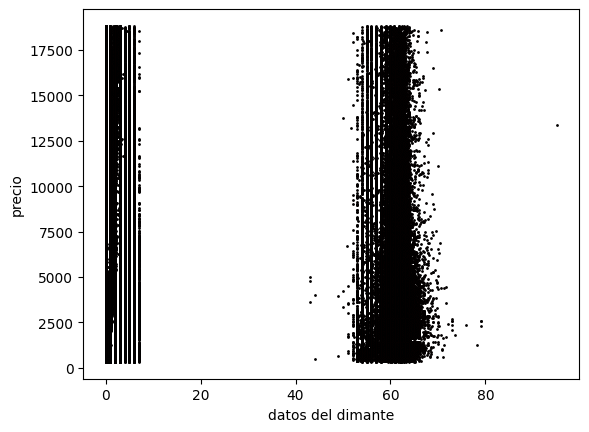

In [12]:
N = X
plotData(N, y)

In [ ]:
print(X)

       carat  cut  color  clarity  depth  table
0       0.23    0      1        2   61.5   55.0
1       0.21    1      1        0   59.8   61.0
2       0.23    2      1        3   56.9   65.0
3       0.29    1      5        1   62.4   58.0
4       0.31    2      6        2   63.3   58.0
...      ...  ...    ...      ...    ...    ...
53938   0.86    1      3        2   61.0   58.0
53939   0.75    0      4        2   62.2   55.0
53940   0.71    1      1        0   60.5   55.0
53941   0.71    1      2        0   59.8   62.0
53942   0.70    3      1        1   60.5   59.0

[53943 rows x 6 columns]


# Descenso por el gradiente
$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$
se realizan las def featurenormlize computecostmult y gradientdescentmulti para poder calcular los datos

In [13]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [14]:
X_norm, mu, sigma = featureNormalize(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       carat  cut  color  clarity  depth  table
0       0.23    0      1        2   61.5   55.0
1       0.21    1      1        0   59.8   61.0
2       0.23    2      1        3   56.9   65.0
3       0.29    1      5        1   62.4   58.0
4       0.31    2      6        2   63.3   58.0
...      ...  ...    ...      ...    ...    ...
53938   0.86    1      3        2   61.0   58.0
53939   0.75    0      4        2   62.2   55.0
53940   0.71    1      1        0   60.5   55.0
53941   0.71    1      2        0   59.8   62.0
53942   0.70    3      1        1   60.5   59.0

[53943 rows x 6 columns]
Media calculada: carat       0.797935
cut         1.228964
color       2.314573
clarity     2.032256
depth      61.749322
table      57.457251
dtype: float64
Desviación estandar calculada: carat      0.473994
cut        1.265953
color      1.820398
clarity    1.790658
depth      1.432613
table      2.234528
dtype: float64
          carat       cut     color   clarity     depth     table
0     -1

In [15]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -1.19818918 -0.97078151 ... -0.01801364 -0.17403335
  -1.09967336]
 [ 1.         -1.24038379 -0.18086286 ... -1.13492146 -1.36067623
   1.58545717]
 [ 1.         -1.19818918  0.60905579 ...  0.54044027 -3.38494937
   3.37554419]
 ...
 [ 1.         -0.18551847 -0.18086286 ... -1.13492146 -0.87205857
  -1.09967336]
 [ 1.         -0.18551847 -0.18086286 ... -1.13492146 -1.36067623
   2.03297893]
 [ 1.         -0.20661578  1.39897445 ... -0.57646755 -0.87205857
   0.69041366]]


In [19]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    lambda_ = 0.1
    J = 0
    h = np.dot(X, theta)
    temp = theta
    temp[0] = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp
    return J

In [20]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### Seleccionando coheficientes de aprendizaje
Se decide la cantidad de interacciones a usar y el coeficiente alpha en este caso se uso 10000 interacciones y alpha 000.1

theta calculado por el descenso por el gradiente: [   0.         3808.47465808 -137.84850813 -322.22601112  195.3597908
 -150.19494514 -138.74202403]
El precio predecido para (usando el descenso por el gradiente): Z:-4022


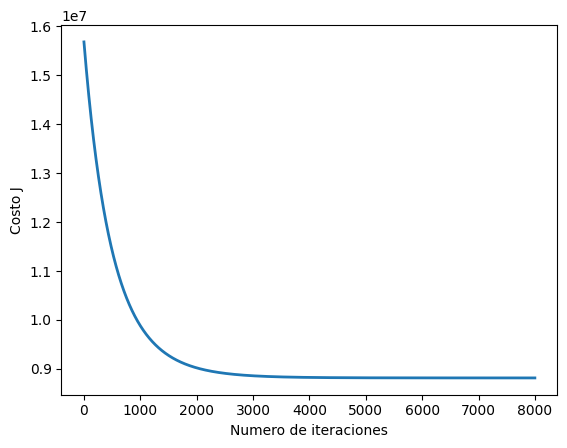

In [21]:
alpha = 0.001
num_iters = 8000
theta = np.zeros(7)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 0.23,	0,	1,	2,	61.5,	55.0]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

In [22]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [23]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print(cost)
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0. 0.]
15690462.618541794
Costo esperado (aproximado): 0.693

[-3932.73429361 -3676.50543863  -197.13013191  -362.86205001
   331.53908009    42.40655939  -507.11147043]
Gradiente en theta inicial (zeros):
	[-3932.7343, -3676.5054, -197.1301]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [24]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2,34,34,34,34])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.    0.2   0.2  34.   34.   34.   34. ]
Costo en theta prueba: 15769287.599
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[-3956.734, -3667.968, -179.747]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [25]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 1082719.612
Costo esperado (aproximado): 0.203

theta:
	[3932.734, 3815.508, -128.455]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-25-0dfcfa2e2ef1>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [26]:
# verificar si ingresa o no a la universidad
X_array = [1, 90, 70,34,34,34,34]
theta_om = [-25.161, 0.206, 0.201,3932.734, 3815.508, -128.455, 34]
X_array[1:7] = (X_array[1:7] - mu) / sigma   # Se debe cambiar esto
price = np.dot(X_array, theta_om)

print(f"Un estudiante con nota del examen 1: {X_array[1]} y nota del examen 2: {X_array[2]} (usando el descenso por el gradiente {price}")

Un estudiante con nota del examen 1: 188.19233007101914 y nota del examen 2: 54.323524220569546 (usando el descenso por el gradiente 138724.39222832993


In [27]:
def predict(theta, X):
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(np.dot(X, theta))
    return p

In [28]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = np.dot([1,0.23,	0,	1,	2,	61.5,	55.0], theta)
print(prob)
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

-13279.11352924723
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 0.06 %
Precisión esperada (aproximadamente): 89.00 %


# 1° corrida

In [ ]:
X_array = [0.1,53934,62,59,6,6,4]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:1781


# 2° corrida

In [ ]:
X_array = [0.2,53935,62.7,59,5.69,5.73,3.58]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:977


# 3° corrida

In [ ]:
X_array = [0.3,53936,60.8,57,5.75,5.76,3.5]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:1686


# 4° corrida


In [ ]:
X_array = [0.4,53937,63.1,55,5.69,5.75,3.61]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:2089


# 5° corrida

In [ ]:
X_array = [0.5,53938,62.8,60,5.66,5.68,3.56]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:1967


# 6° corrida

In [ ]:
X_array = [0.6,53936,60.8,57,5.75,5.76,3.5]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:2866


# 7° corrida

In [ ]:
X_array = [0.7,53939,61,58,6.15,6.12,3.74]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:4449


# 8° corrida

In [ ]:
X_array = [0.8,53940,62.2,55,5.83,5.87,3.64]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:4098


# 9° corrida

In [ ]:
X_array = [0.9,53941,60.5,55,5.79,5.74,3.49]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:4281


# 10° corrida

In [ ]:
X_array = [0.21,53942,59.8,62,5.74,5.73,3.43]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:895


los valores con este metodo son medianamente cercanos con algunos valores y un poco lejanos con otros valores

# Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [ ]:
data = genfromtxt('/content/drive/MyDrive/IA/dataset/Diamonds Prices2022.csv',delimiter=',')
X = data[:, :11]
X = np.delete(X, 0, axis=0)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 3, axis=1)
y = data[:, 7]
y = np.delete(y, 0, axis=0)
m = y.size

m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

53943


In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:

theta = normalEqn(X, y);
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

X_array = [0.1,53934,62,59,6,6,4]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-1.05250576e+04  1.55808483e-02 -9.36144836e-01 -8.05283725e+01
  2.99874063e+03  2.10020092e+02  9.37251798e+01]
El precio predecido para (usando el descenso por el gradiente): Z:14606


# 1° corrida

In [ ]:
X_array = [0.1,53934,62,59,6,6,4]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:14606


# 2° corrida

In [ ]:
theta = normalEqn(X, y);
X_array = [0.2,53935,62.7,59,5.69,5.73,3.58]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:12527


# 3° corrida

In [ ]:
X_array = [0.3,53936,60.8,57,5.75,5.76,3.5]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:11816


# 4° corrida

In [ ]:
X_array = [0.4,53937,63.1,55,5.69,5.75,3.61]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:10751


# 5° corrida

In [ ]:
X_array = [0.5,53938,62.8,60,5.66,5.68,3.56]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:9187


# 6° corrida

In [ ]:
X_array = [0.6,53936,60.8,57,5.75,5.76,3.5]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:8659


# 7° corrida

In [ ]:
X_array = [0.7,53939,61,58,6.15,6.12,3.74]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:8823


# 8° corrida

In [ ]:
X_array = [0.8,53940,62.2,55,5.83,5.87,3.64]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:6990


# 9° corrida

In [ ]:
X_array = [0.9,53941,60.5,55,5.79,5.74,3.49]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:5778


# 10° corrida

In [ ]:
X_array = [0.21,53942,59.8,62,5.74,5.73,3.43]
price = np.dot(X_array, theta)

print('El precio predecido para (usando el descenso por el gradiente): Z:{:.0f}'.format(price))

El precio predecido para (usando el descenso por el gradiente): Z:12319


los valores con el metodo que se optienen con la ecuacion normal son muy lejanos

# Regresión polinomica

In [ ]:
data = genfromtxt('/content/drive/MyDrive/IA/dataset/Diamonds Prices2022.csv',delimiter=',')
X = data[:, :11]
X = np.delete(X, 0, axis=0)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 3, axis=1)
X  = np.delete(X , 0, axis=1)
X  = np.delete(X , 0, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
X  = np.delete(X , 1, axis=1)
y = data[:, 7]
y = np.delete(y, 0, axis=0)
m = y.size

m = y.size
print(m)
print('{:>8s}{:>8s}'.format('X[:,0]', 'y'))
print('-'*80)
for i in range(10):
  print('{:8.0f}{:8.0f}'.format(X[i, 0], y[i]))

53943
  X[:,0]       y
--------------------------------------------------------------------------------
      55     326
      61     326
      65     327
      58     334
      58     335
      57     336
      57     336
      55     337
      61     337
      61     338


In [ ]:
X = np.concatenate([X, X * X], axis=1)

In [ ]:
print(X)

[[  55. 3025.]
 [  61. 3721.]
 [  65. 4225.]
 ...
 [  55. 3025.]
 [  62. 3844.]
 [  59. 3481.]]


In [ ]:
X_norm, mu, sigma = featureNormalize(X)

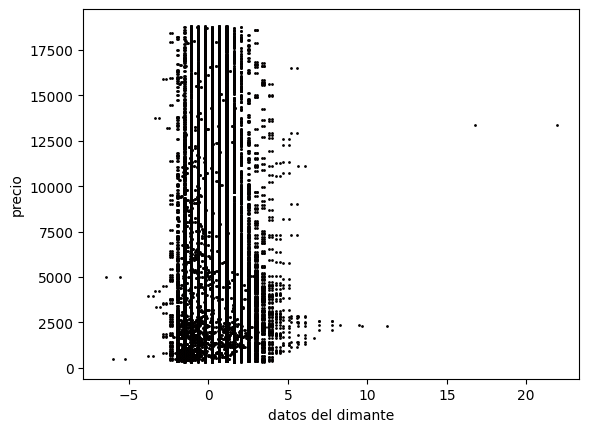

In [ ]:
plotData(X_norm, y)

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -1.09967336 -1.07806436]
 [ 1.          1.58545717  1.58903803]
 [ 1.          3.37554419  3.52038804]
 ...
 [ 1.         -1.09967336 -1.07806436]
 [ 1.          2.03297893  2.0603794 ]
 [ 1.          0.69041366  0.66934755]]


## Seleccionando coheficientes de aprendizaje

theta calculado por el descenso por el gradiente: [3932.73429361  443.55506375   59.83759765]
La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): $4113


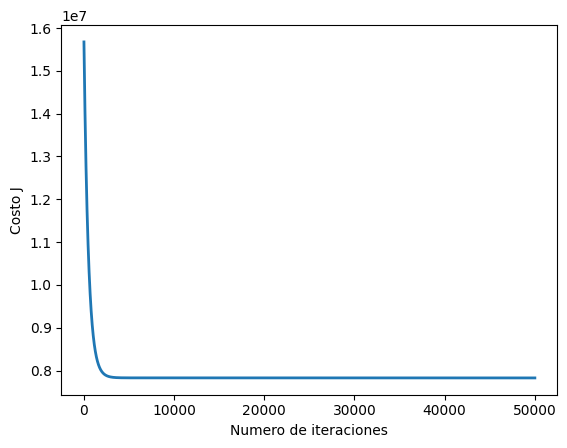

In [ ]:
alpha = 0.001
num_iters = 50000
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 59,2757]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)

print('prediccion de precio de diamante se 60 (usando el descenso por el gradiente): ${:.0f}'.format(price))

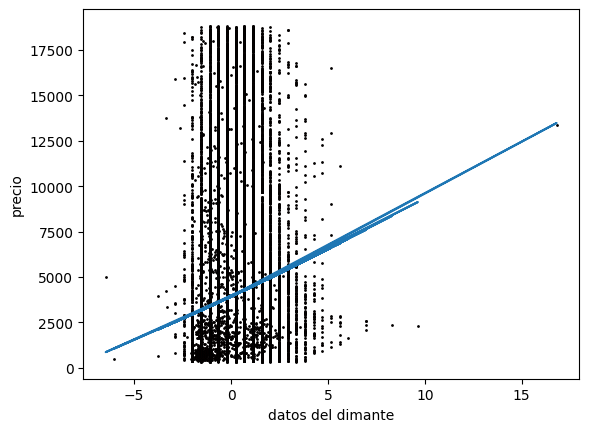

In [ ]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

# 1° corrida

In [ ]:
X_array = [0.7, 59,2757]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

2933.189223683248


# 2° corrida

In [ ]:
X_array = [0.5, 60,2757]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

2345.1429055223975


# 3° corrida

In [ ]:
X_array = [0.5, 55,2756]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1352.4109024335908


# 4° corrida

In [ ]:
X_array = [0.5, 58,2756]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1947.9125241147303


# 5° corrida

In [ ]:
X_array = [0.5, 56,2756]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1550.9114429939707


# 6° corrida

In [ ]:
X_array = [0.5, 60,2755]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

2344.684304948583


# 7° corrida

In [ ]:
X_array = [0.5, 55,2753]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1351.723001572869


# 8° corrida

In [ ]:
X_array = [0.8, 52,2745]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1934.207265678317


# 9° corrida

In [ ]:
X_array = [0.4, 59,2755]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

1752.9103350275877


# 10° corrida

In [ ]:
X_array = [0.5, 62,2756]
X_array[1:3] = (X_array[1:3] - mu) / sigma
X_array[1:3]
print(np.dot(X_array, theta))

2741.91468635625


los valores son mas cercanos que con los otros metodos anteriores